#Задание
**Цель:**
 Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

**Описание задания:**

В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с [сайта](https://www.kaggle.com/uciml/glass). Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

**1) Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [ ]:
data = pd.read_csv('glass.csv')

In [ ]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**2) Проведите первичный анализ.**

а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Всего в датасете 214 строк, пропущенных значений нет, все признаки имеют числовой тип данных

In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Данные не сбалансированы, количество строк с признаками для каждого класса сильно отличаются, в идеале должно быть равное количество строк для каждого класса

**3) Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**

In [ ]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
X = data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = data['Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**4)Обучите модель дерева решений RandomForestClassifier на обучающем множестве.**

In [ ]:
rfc = RandomForestClassifier(random_state = 42)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**5)Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).**

In [ ]:
predict_rfc = rfc.predict(X_test)

In [ ]:
accuracy_score(y_test,predict_rfc)

0.7906976744186046

**6)Обработайте выбросы в данных.**

а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

b) Исследуйте признаки на выбросы несколькими способами.

c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

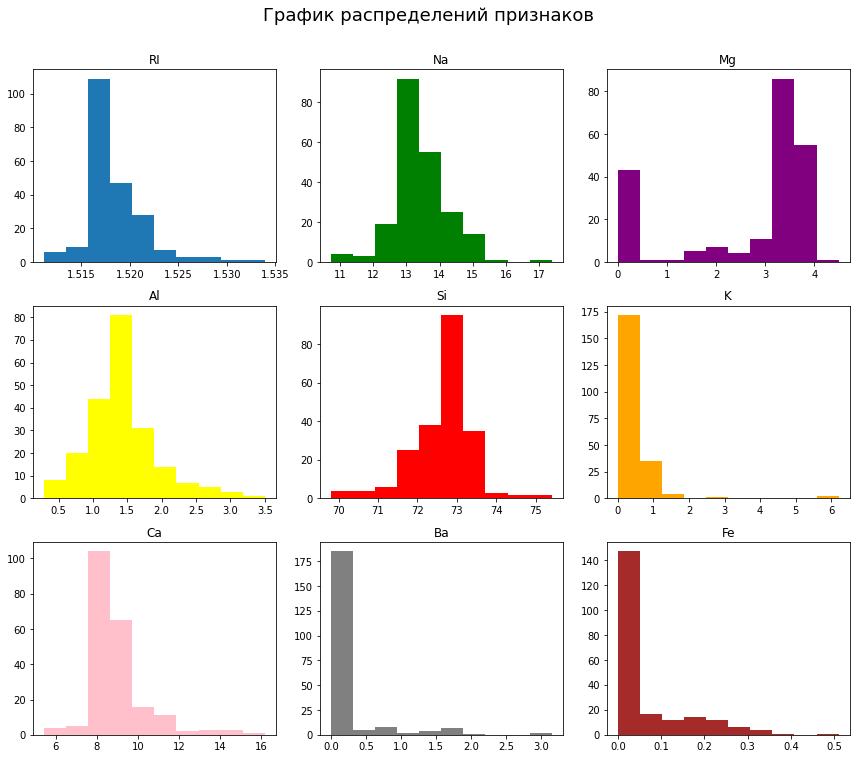

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(12,10))
fig.suptitle('График распределений признаков', y=1.05, fontsize=18)
axs[0, 0].hist(data['RI']) 
axs[0, 0].set_title('RI')
axs[0, 1].hist(data['Na'], color= 'green')
axs[0, 1].set_title('Na')
axs[0, 2].hist(data['Mg'], color= 'purple')
axs[0, 2].set_title('Mg')
axs[1, 0].hist(data['Al'],color= 'yellow')
axs[1, 0].set_title('Al')
axs[1, 1].hist(data['Si'],color= 'red')
axs[1, 1].set_title('Si')
axs[1, 2].hist(data['K'],color= 'orange')
axs[1, 2].set_title('K')
axs[2, 0].hist(data['Ca'],color= 'pink')
axs[2, 0].set_title('Ca')
axs[2, 1].hist(data['Ba'],color= 'gray')
axs[2, 1].set_title('Ba')
axs[2, 2].hist(data['Fe'],color= 'brown')
axs[2, 2].set_title('Fe')
fig.tight_layout()

Признаки наиболее близкие к нормальному распределению:
RI, Na, Al, Si 

Исследуем признаки на выбросы с помощью boxplot

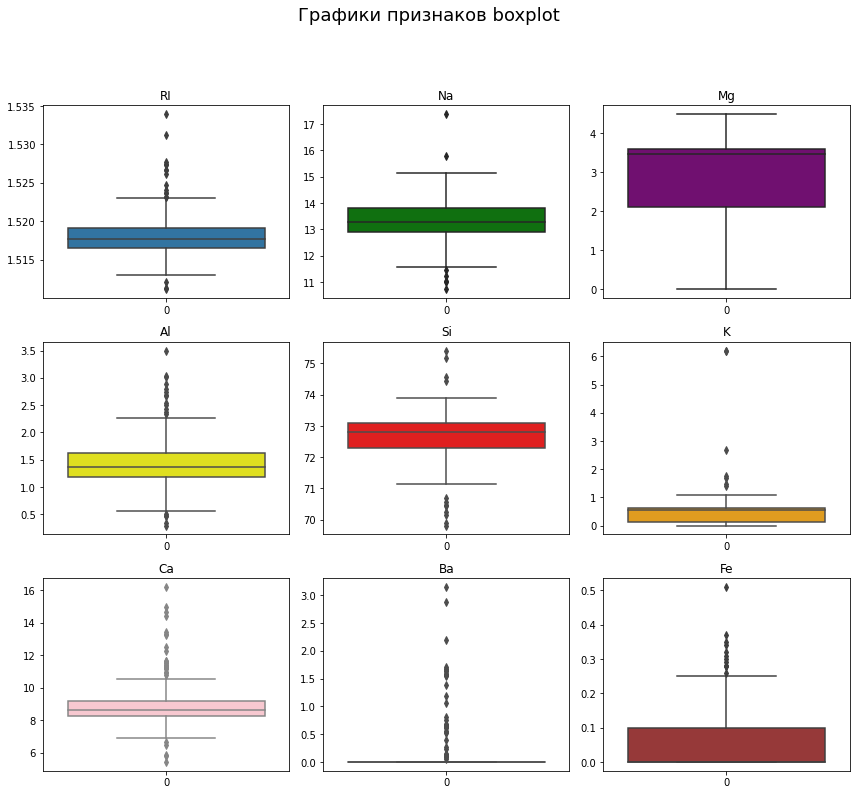

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(12,10))
fig.suptitle('Графики признаков boxplot', y= 1.1, fontsize=18)
sns.boxplot(ax = axs[0,0], data = data['RI'])
axs[0, 0].set_title('RI')
sns.boxplot(ax = axs[0,1], data = data['Na'],color= 'green')
axs[0, 1].set_title('Na')
sns.boxplot(ax = axs[0,2], data = data['Mg'], color= 'purple')
axs[0, 2].set_title('Mg')
sns.boxplot(ax = axs[1,0], data = data['Al'],color= 'yellow')
axs[1, 0].set_title('Al')
sns.boxplot(ax = axs[1,1], data = data['Si'],color= 'red')
axs[1, 1].set_title('Si')
sns.boxplot(ax = axs[1,2], data = data['K'],color= 'orange')
axs[1, 2].set_title('K')
sns.boxplot(ax = axs[2,0], data = data['Ca'],color= 'pink')
axs[2, 0].set_title('Ca')
sns.boxplot(ax = axs[2,1], data = data['Ba'],color= 'gray')
axs[2, 1].set_title('Ba')
sns.boxplot(ax = axs[2,2], data = data['Fe'],color= 'brown')
axs[2, 2].set_title('Fe')
fig.tight_layout()

Судя по графикам у всех признаков кроме Mg имеются выбросы

Сделаем копию нашего датафрейма и попробуем убрать выбросы.
Определим для каждого признака нижний порог и признаки у которых значение будет ниже нижнего порога будут считаться выбросами, так же определим верхний порог и признаки у которых значение будет выше верхнего порога тоже будут считаться выбросами. Строки в которых по одному из признаков будут выбросы, будем убирать

In [ ]:
data1 = data.copy()
data1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
for col in data1.columns:
  up = (data1[col].quantile(0.75)-data1[col].quantile(0.25)) * 1.5 + data1[col].quantile(0.75)
  low = data1[col].quantile(0.25)- (data1[col].quantile(0.75)-data1[col].quantile(0.25)) * 1.5
  data1 = data1[(data1[col]<up)&(data1[col]>low)]
  print(len(data1))
  

197
196
160
150
145
121
116
0
0
0


In [ ]:
data1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


В итоге у нас не осталось данных для обучения, потому что во всех строках датафрейма по одному из признаков есть выбросы. Попробуем определить выбросы с помощью моделей машинного обучения

**Изолированный лес**

In [ ]:
isol_f = IsolationForest()

In [ ]:
isol_f.fit(X)

IsolationForest()

In [ ]:
outliers_isol_f= isol_f.predict(X)

In [ ]:
outliers_isol_f

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

**Одноклассовый SVM**

In [ ]:
svm = OneClassSVM(nu=0.1)

In [ ]:
svm.fit(X)

OneClassSVM(nu=0.1)

In [ ]:
outliers_svm = svm.predict(X)

In [ ]:
outliers_svm

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

Значения -1 в результате наши модели определили как выбросы

Создадим копию исходного датафрейма, добавим колонки с предсказаниями выбросов ранее обученных моделей и уберем только те строки, которые обе наши модели посчитали за выбросы

In [ ]:
data_no_outliers = data.copy()

In [ ]:
data_no_outliers['outliers_isol_f'] = outliers_isol_f

In [ ]:
data_no_outliers['outliers_svm'] = outliers_svm

In [ ]:
data_no_outliers.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,outliers_isol_f,outliers_svm
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1,-1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1,1


In [ ]:
data_no_outliers = data_no_outliers[(data_no_outliers['outliers_isol_f'] != -1)&
                                    (data_no_outliers['outliers_svm'] != -1)]

In [ ]:
print(f'{round((100 - (len(data_no_outliers)/len(data))*100),2)}% данных мы потеряли избавившись от выбросов')

12.15% данных мы потеряли избавившись от выбросов


In [ ]:
from collections import Counter

In [ ]:
counter_data = Counter(data['Type'])

In [ ]:
counter_outliers = Counter(data_no_outliers['Type'])

In [ ]:
percent = pd.DataFrame(list(counter_data.items()),
                   columns=['Класс', 'Количество строк с выбросами'])

In [ ]:
percent['Количество строк без выбросов'] = counter_outliers.values()

In [ ]:
percent['% потери данных по классам'] = round((100 - percent['Количество строк без выбросов']/
                                               percent['Количество строк с выбросами']*100),2)

In [ ]:
percent['% удаленных записей от общего числа записей для каждого класса'] = (percent['Количество строк с выбросами']-percent['Количество строк без выбросов'])/len(data)*100


In [ ]:
percent

,Класс,Количество строк с выбросами,Количество строк без выбросов,% потери данных по классам,% удаленных записей от общего числа записей для каждого класса
0,1,70,68,2.86,0.934579
1,2,76,65,14.47,5.140187
2,3,17,16,5.88,0.467290
3,5,13,8,38.46,2.336449
4,6,9,7,22.22,0.934579
5,7,29,24,17.24,2.336449


**7) Повторите п. 4, п. 5.**

In [ ]:
data_no_outliers.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type',
       'outliers_isol_f', 'outliers_svm'],
      dtype='object')

In [ ]:
X = data_no_outliers[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]

In [ ]:
y = data_no_outliers['Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rfc = RandomForestClassifier(random_state = 42)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
predict_rfc = rfc.predict(X_test)

In [ ]:
accuracy_score(y_test,predict_rfc)

0.8421052631578947

**8) Сформулируйте выводы по проделанной работе.**

*Точность предсказания модели, после удаления выбросов, стала лучше.*

*Выбросы нужно анализировать всегда, так как это могут быть просто ошибки в данных и модель будет искать закономерности там где их на самом деле нет, подстраиваясь под некорректные данные, тем самым ухудшая свои метрики.*